In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 定义 sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 定义代价函数
def cost_function(y_true, y_pred):
    return -1 / len(y_true) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


loss_history = []


# 定义梯度下降函数
def gradient_descent(x, y, w, b, lr, epoch):
    # each epoch 所有样本训练一次
    m = len(x)
    for i in range(epoch):
        y_pred = sigmoid(np.dot(x, w) + b)
        loss = cost_function(y, y_pred).item()
        gradient_w = 1 / m * np.sum(np.dot(x.T, y_pred - y))  # np.dot not *
        gradient_b = 1 / m * np.sum(y_pred - y)
        loss_history.append(loss)

        w = w - lr * gradient_w
        b = b - lr * gradient_b
    return w, b


def stochastic_gradient_descent(x, y, w, b, lr, epoch):
    m = len(x)
    for i in range(epoch):
        # iteration 共m次
        temp = []
        for j in range(m):
            y_pred = sigmoid(x[j] * w + b)
            loss = cost_function(y[j].reshape(1, 1), y_pred).item()
            gradient_w = 1 / m * x[j] * (y_pred - y[j])
            gradient_b = 1 / m * (y_pred - y[j])
            w = w - lr * gradient_w
            b = b - lr * gradient_b
            temp.append(loss)
        loss_history.append(np.mean(temp))
    return w, b


def predict(x, w, b):
    y_pred = sigmoid(np.dot(x, w) + b)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    return y_pred


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [3]:

data = pd.read_excel("data/breast_cancer_wisconsin.xlsx", index_col=0)
#Class列为标签列，2为良性，4为恶性,将标签列转换为0，1
data["Class"] = (data["Class"] / 2 - 1).astype(int)
# data["Class"].head(10)


In [9]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

x_train = train.iloc[:, [1, 2]].values
y_train = train["Class"].values
x_test = test.iloc[:, [1, 2]].values
y_test = test["Class"].values
#归一化
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_std) / x_train_std  #使用训练集的均值和方差归一化测试集

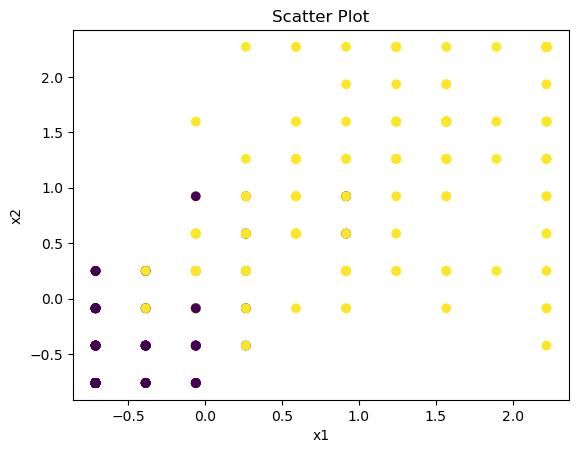

In [4]:
# 绘制散点图
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.show()

In [5]:
# 初始化参数
w_ = np.random.randn(2)
b_ = np.random.randn(1)
# 定义超参数
lr1 = 0.1
epoch1 = 100

# 运行梯度下降算法
w, b, = gradient_descent(x_train, y_train, w_, b_, lr1, epoch1)

# 输出参数
f"Weights: {w}, Bias: {b}"


'Weights: [1.51973143 2.12252246], Bias: [-0.14109522]'

In [6]:
#accuracy
f"Accuracy: {accuracy(y_test, predict(x_test, w, b))}"

'Accuracy: 0.95'

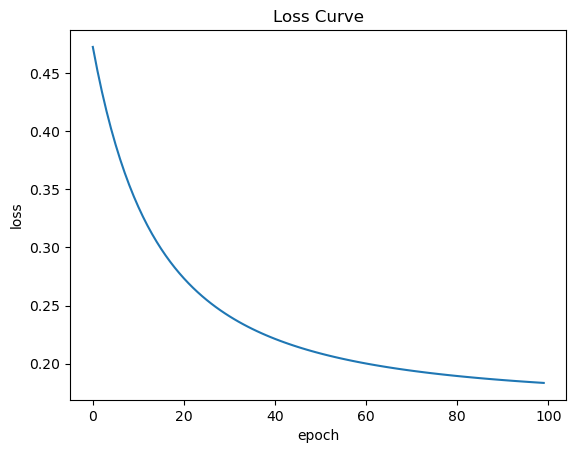

In [7]:
# 绘制损失曲线
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()

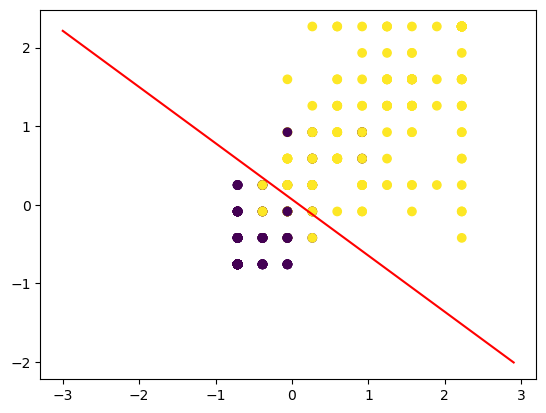

In [8]:
#绘制决策边界
#绘制决策边界
x1 = np.arange(-3, 3, 0.1)
x2 = -(w[0] * x1 + b) / w[1]  # w0*x1+w1*x2+b=0
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.plot(x1, x2, c='r')
plt.show()

In [9]:
loss_history.clear()
# 运行随机梯度下降算法
lr2 = 0.2
epoch2 = 100
w, b, = stochastic_gradient_descent(x_train, y_train, w_, b_, lr2, epoch2)
# 输出参数
f"Weights: {w}, Bias: {b}"

'Weights: [2.47456601 2.57277911], Bias: [-0.49888565 -0.51320601]'

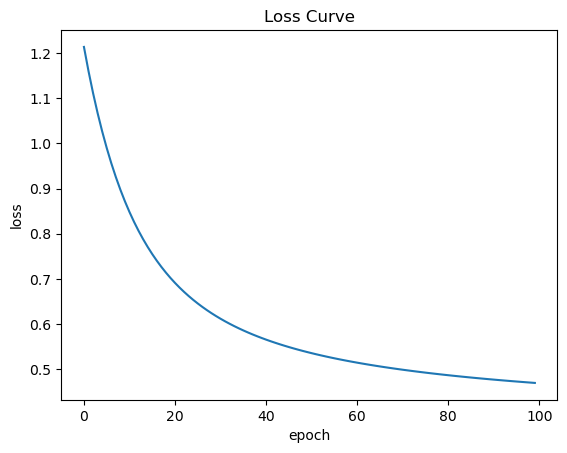

In [10]:
# 绘制损失曲线
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()